# Employee  Attrition Analysis
#### By Ajay Dhariwal (M13966779) and Priyanshi Singh (M1400289)

## Problem Statement:

A large company employs around 4000 employees. Every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management has contracted an HR analytics firm to understand what factors they should focus on in order to curb attrition.

In this project we will analyse the datasets and build various models to best capture employee attrition.

# 1. Importing Data and Exploring Data

In [3]:
#Importing the desired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
import statistics
import requests
from bs4 import BeautifulSoup
import csv
from collections import Counter
from scipy import stats

In [5]:
# We will be using the 5 datasets provided. 
general_data = pd.read_csv(r"C:\\Users\\priya\\Downloads\\general_data.csv")
employee_survey_data = pd.read_csv(r"C:\\Users\\priya\Downloads\\employee_survey_data.csv")
manager_survey_data = pd.read_csv(r"C:\\Users\\priya\\Downloads\\manager_survey_data.csv")
in_time = pd.read_csv(r"C:\\Users\\priya\\Downloads\\in_time.csv")
out_time = pd.read_csv(r"C:\\Users\\priya\\Downloads\\out_time.csv")

In [6]:
# Checking the Shape of the datsets 
general_data.shape, employee_survey_data.shape, manager_survey_data.shape, in_time.shape, out_time.shape

((4410, 24), (4410, 4), (4410, 3), (4410, 262), (4410, 262))

From the Shape of all the datasets, we observe data is provided to us for 4,410 Employees. To further confirm this we will check the uniqueness of the general employee dataset

In [7]:
general_data.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


In [8]:
general_data['EmployeeID'].nunique()

4410

In [9]:
# Checking the Structure of the data 
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
general_data["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

## Employee Survey Data

In [11]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [12]:
employee_survey_data['EmployeeID'].nunique()

4410

Survey data is also unique at employee level ID

# Manager Survey Data

In [13]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [14]:
manager_survey_data['EmployeeID'].nunique()

4410

Manager Surevy Data is also unique at the EmployeeID level

# In-time data

In [15]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


There are null values in the dataset

In [16]:
null_in_time=pd.DataFrame(in_time.isna().sum(),columns=['Null'])

In [17]:
null_in_time.head()

,Null
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228


In [18]:
#The dates where are all the values are null
null_in_time[null_in_time['Null']==4410]

,Null
2015-01-01,4410
2015-01-14,4410
2015-01-26,4410
2015-03-05,4410
2015-05-01,4410
2015-07-17,4410
2015-09-17,4410
2015-10-02,4410
2015-11-09,4410
2015-11-10,4410


In [19]:
null_in_time[null_in_time['Null']!=4410].mean()

Null    224.64
dtype: float64

We have around columns that are not completely null

### Out time Data

In [20]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [21]:
null_in_time[null_in_time['Null']==4410]

,Null
2015-01-01,4410
2015-01-14,4410
2015-01-26,4410
2015-03-05,4410
2015-05-01,4410
2015-07-17,4410
2015-09-17,4410
2015-10-02,4410
2015-11-09,4410
2015-11-10,4410


# Web Scrapping using Beautiful Soup

In [22]:
url = 'https://www.timeanddate.com/holidays/india/2015?hol=1' #website with the list of Indian holidays in 2015
soup = BeautifulSoup(requests.get(url).text, 'lxml')
out = [[td.text.strip() for td in tr.select('th, td')] for tr in soup.select('tr[data-mask]')]

In [23]:
with open('holidays.csv', 'w') as f_out:
    writer=csv.writer(f_out)
    writer.writerows(out)
# above code extracts the table from the website and saves it in the 'holidays.csv' file

In [24]:
df=pd.read_csv('holidays.csv',header =None, names = ['Date','Day','Festival','Type'])
df.head()

,Date,Day,Festival,Type
0,Jan 1,Thursday,New Year's Day,Restricted Holiday
1,Jan 4,Sunday,Milad un-Nabi/Id-e-Milad,Gazetted Holiday
2,Jan 5,Monday,Guru Govind Singh Jayanti,Restricted Holiday
3,Jan 15,Thursday,Pongal,Restricted Holiday
4,Jan 15,Thursday,Makar Sankranti,Restricted Holiday


In [25]:
NA_checklist = ['Jan 1','Jan 14', 'Jan 26', #list containing all the above dates with 4410 NA values  
               'Mar 5', 'May 1', 'Jul 17',
               'Sep 17', 'Oct 2', 'Nov 9',
               'Nov 10', 'Nov 11', 'Dec 25']

df[df['Date'].isin(NA_checklist)]

,Date,Day,Festival,Type
0,Jan 1,Thursday,New Year's Day,Restricted Holiday
7,Jan 26,Monday,Republic Day,Gazetted Holiday
14,Mar 5,Thursday,Holika Dahana,Restricted Holiday
29,May 1,Friday,May Day,Observance
36,Jul 17,Friday,Jamat Ul-Vida,Restricted Holiday
47,Sep 17,Thursday,Ganesh Chaturthi/Vinayaka Chaturthi,Restricted Holiday
50,Oct 2,Friday,Mahatma Gandhi Jayanti,Gazetted Holiday
60,Nov 10,Tuesday,Naraka Chaturdasi,Restricted Holiday
61,Nov 11,Wednesday,Diwali/Deepavali,Gazetted Holiday
71,Dec 25,Friday,Christmas,Gazetted Holiday


In [26]:
melted_in_time = in_time.melt(id_vars = "Unnamed: 0",
                              value_vars = list(in_time.columns).remove("Unnamed: 0"),var_name = "Date", value_name = "Time")


In [27]:
melted_out_time=out_time.melt(id_vars='Unnamed: 0',value_vars=list(out_time.columns).remove('Unnamed: 0'),
                              var_name='Date',value_name='Time')

In [28]:
melted_out_time.head(2)

,Unnamed: 0,Date,Time
0,1,2015-01-01,NaN
1,2,2015-01-01,NaN


## Merging the datasets( melted_in_time and melted_out_Time) for finding the time spent by each employee in the office

In [29]:
master_time = pd.merge(melted_in_time,
                      melted_out_time,
                      on = ["Unnamed: 0", "Date"],
                      how = "inner")


In [30]:
master_time.head(2)

,Unnamed: 0,Date,Time_x,Time_y
0,1,2015-01-01,NaN,NaN
1,2,2015-01-01,NaN,NaN


### Converting the in_time and out_time to datetime formats for calculating the time spent by each employee in the office

In [31]:
master_time['in_time_0'] = pd.to_datetime(master_time['Time_x'])
master_time['out_time_0'] = pd.to_datetime(master_time['Time_y'])

In [32]:
# Dropping the Null Values

In [33]:
master_time1 = master_time.dropna()
master_time1.shape


(1041930, 6)

In [34]:
master_time1['time_spent']=((master_time1['out_time_0'] - master_time1['in_time_0'])/np.timedelta64(1,'h'))

In [35]:
#Rename the Unnamed column to Employee Id
master_time1.rename(columns = {"Unnamed: 0": "EmployeeID"}, inplace = True)

In [36]:
master_time1.head()

,EmployeeID,Date,Time_x,Time_y,in_time_0,out_time_0,time_spent
4410,1,2015-01-02,2015-01-02 09:43:45,2015-01-02 16:56:15,2015-01-02 09:43:45,2015-01-02 16:56:15,7.208333
4411,2,2015-01-02,2015-01-02 10:15:44,2015-01-02 18:22:17,2015-01-02 10:15:44,2015-01-02 18:22:17,8.109167
4412,3,2015-01-02,2015-01-02 10:17:41,2015-01-02 16:59:14,2015-01-02 10:17:41,2015-01-02 16:59:14,6.692500
4413,4,2015-01-02,2015-01-02 10:05:06,2015-01-02 17:25:24,2015-01-02 10:05:06,2015-01-02 17:25:24,7.338333
4414,5,2015-01-02,2015-01-02 10:28:17,2015-01-02 18:31:37,2015-01-02 10:28:17,2015-01-02 18:31:37,8.055556


Keeping just the above created field and aggregating the data on employee level to get mean time spent in the office

In [37]:
master_time_final = master_time1[['EmployeeID', 'time_spent']]
master_time_final.head()

,EmployeeID,time_spent
4410,1,7.208333
4411,2,8.109167
4412,3,6.692500
4413,4,7.338333
4414,5,8.055556


In [38]:
master_time_final['EmployeeID'].nunique()

4410

In [39]:
#We will find the average time of each employee
master_=pd.DataFrame(master_time_final.groupby('EmployeeID').mean(['time_spent'])['time_spent']).reset_index()
master_

,EmployeeID,time_spent
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175
...,...,...
4405,4406,8.522277
4406,4407,6.092954
4407,4408,7.706632
4408,4409,9.492595


Merging all the datasets to the get a master dataset for further analysis and modeling

In [40]:
master_data=pd.merge(pd.merge(pd.merge(manager_survey_data,master_, on='EmployeeID',how='inner'),
         employee_survey_data, how='inner',on='EmployeeID'),general_data,how='inner',on='EmployeeID')

In [41]:
# This is created to compare impact of outlier value removal. This has been done at a later stage in the code.  
df=master_data['YearsAtCompany'].copy()

In [42]:
master_data.head()

,EmployeeID,JobInvolvement,PerformanceRating,time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,7.373651,3.0,4.0,2.0,51,No,Travel_Rarely,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,7.718969,3.0,2.0,4.0,31,Yes,Travel_Frequently,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,7.013240,2.0,2.0,1.0,32,No,Travel_Frequently,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,7.193678,4.0,4.0,3.0,38,No,Non-Travel,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,8.006175,4.0,1.0,3.0,32,No,Travel_Rarely,...,4.0,Y,12,8,2,9.0,2,6,0,4


##  Converting the Attrition Column into binary variable using Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
labelencoder = LabelEncoder()

In [45]:
# Assigning numerical values and storing in another column
master_data['Attrition'] = labelencoder.fit_transform(master_data['Attrition'])
master_data['Attrition']

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int32

### Checking the Null values and imputing them if required

In [46]:
master_data.isna().sum()

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
time_spent                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There are null values in the columns
* NumCompaniesWorked
* TotalWorkingYears
* EnvironmentSatisfaction
* JobSatisfaction
* WorkLifeBalance <br>
Imputing the median values in place of null values to prevent any data loss

In [47]:
master_data['NumCompaniesWorked']=master_data['NumCompaniesWorked'].fillna(master_data['NumCompaniesWorked'].median())
master_data['TotalWorkingYears']=master_data['TotalWorkingYears'].fillna(master_data['TotalWorkingYears'].median())
master_data['EnvironmentSatisfaction']=master_data['EnvironmentSatisfaction'].fillna(master_data['EnvironmentSatisfaction'].median())
master_data['JobSatisfaction']=master_data['JobSatisfaction'].fillna(master_data['JobSatisfaction'].median())
master_data['WorkLifeBalance']=master_data['WorkLifeBalance'].fillna(master_data['WorkLifeBalance'].median())

In [48]:
master_data.isna().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
time_spent                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

 # 2. Exploratory Data Analysis

In [49]:
master_data.describe()

,EmployeeID,JobInvolvement,PerformanceRating,time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741,7.700792,2.725170,2.729478,2.763492,36.923810,0.161224,9.192517,...,65029.312925,2.691837,15.209524,8.0,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129
std,1273.201673,0.711400,0.360742,1.340218,1.089852,1.098904,0.703541,9.133301,0.367780,8.105026,...,47068.888559,2.493912,3.659108,0.0,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327
min,1.000000,1.000000,3.000000,5.950504,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.250000,2.000000,3.000000,6.673333,2.000000,2.000000,2.000000,30.000000,0.000000,2.000000,...,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2205.500000,3.000000,3.000000,7.406761,3.000000,3.000000,3.000000,36.000000,0.000000,7.000000,...,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3307.750000,3.000000,3.000000,8.368703,4.000000,4.000000,3.000000,43.000000,0.000000,14.000000,...,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,4410.000000,4.000000,4.000000,11.030960,4.000000,4.000000,4.000000,60.000000,1.000000,29.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## Plots

In [50]:
master_data.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating', 'time_spent',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

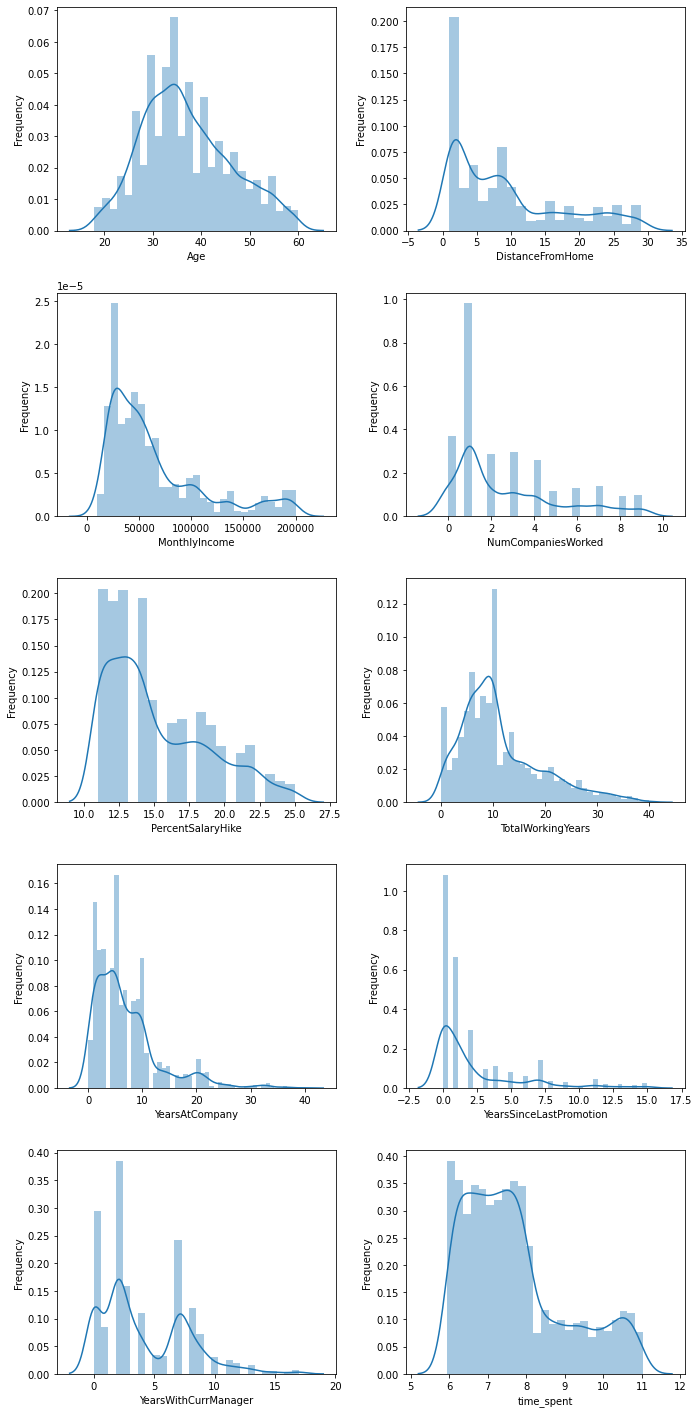

In [51]:
col_names_hist = ['Age', 'DistanceFromHome','MonthlyIncome',
                  'NumCompaniesWorked','PercentSalaryHike',
                 'TotalWorkingYears',
                 'YearsAtCompany',
                 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                 'time_spent']

master_data1=master_data[col_names_hist]
fig1,ax=plt.subplots(nrows=5,ncols=2,figsize=(10,20))
ax=ax.flatten()
start=0
for i,j in master_data1.items():
    sns.distplot(j,ax=ax[start])
    ax[start].set_ylabel('Frequency')
    start+=1
fig1.tight_layout(pad =  2.0)

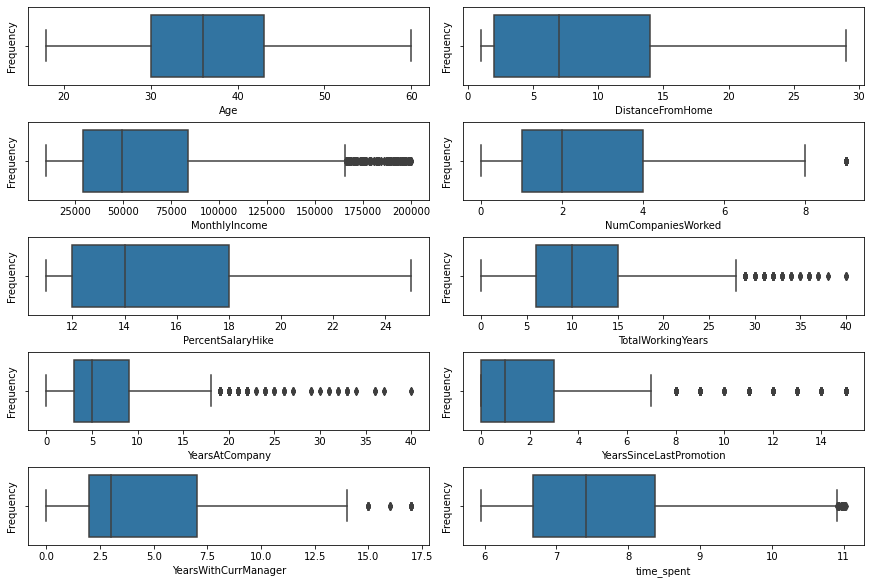

In [52]:
fig2,ax1=plt.subplots(nrows=5,ncols=2,figsize=(12,8),constrained_layout=True)
ax1=ax1.flatten()
start=0
for i,j in master_data1.items():
    sns.boxplot(j,ax=ax1[start])
    ax1[start].set_ylabel('Frequency')
    start+=1
fig1.tight_layout(pad =  4.0)

In [53]:
# Barplots
#Barplots
col_names_bar = ['BusinessTravel','Department',
                'Education','EducationField', 'Gender',
                'JobLevel', 'JobRole', 'MaritalStatus',
                'StockOptionLevel',
                'JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction',
                'JobSatisfaction','WorkLifeBalance']
master_bar=master_data[col_names_bar]

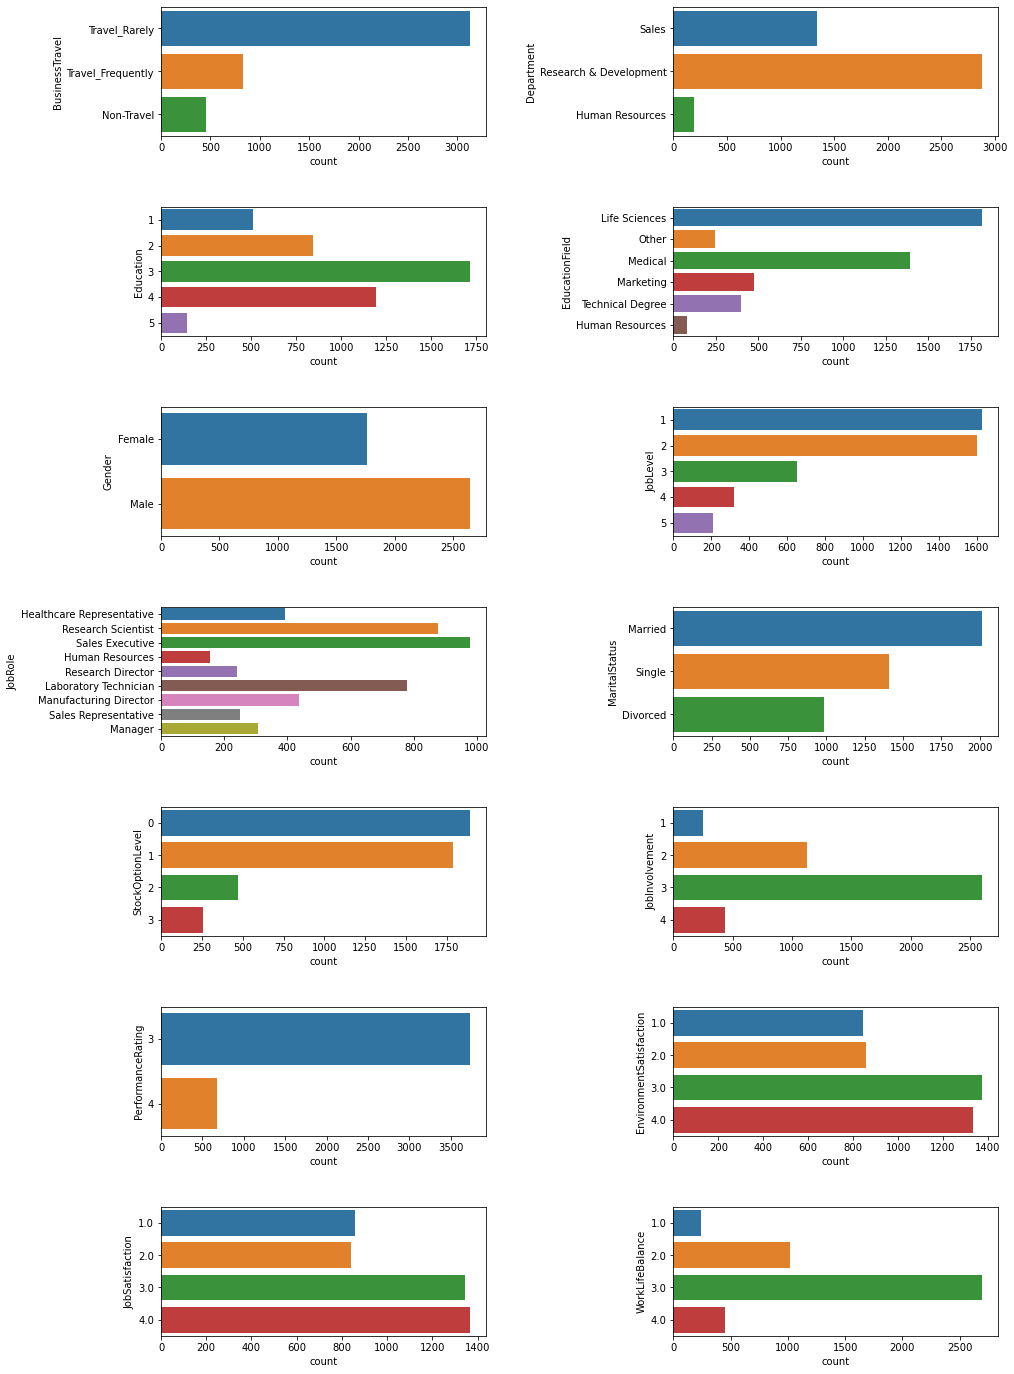

In [54]:
fig3,ax2=plt.subplots(nrows=7,ncols=2,figsize=(15,20),constrained_layout=True)
ax2=ax2.flatten()
start=0
for i,j in master_bar.items():
    sns.countplot(y=j,ax=ax2[start])
    start+=1
fig3.tight_layout(pad =  4.0)

<AxesSubplot:>

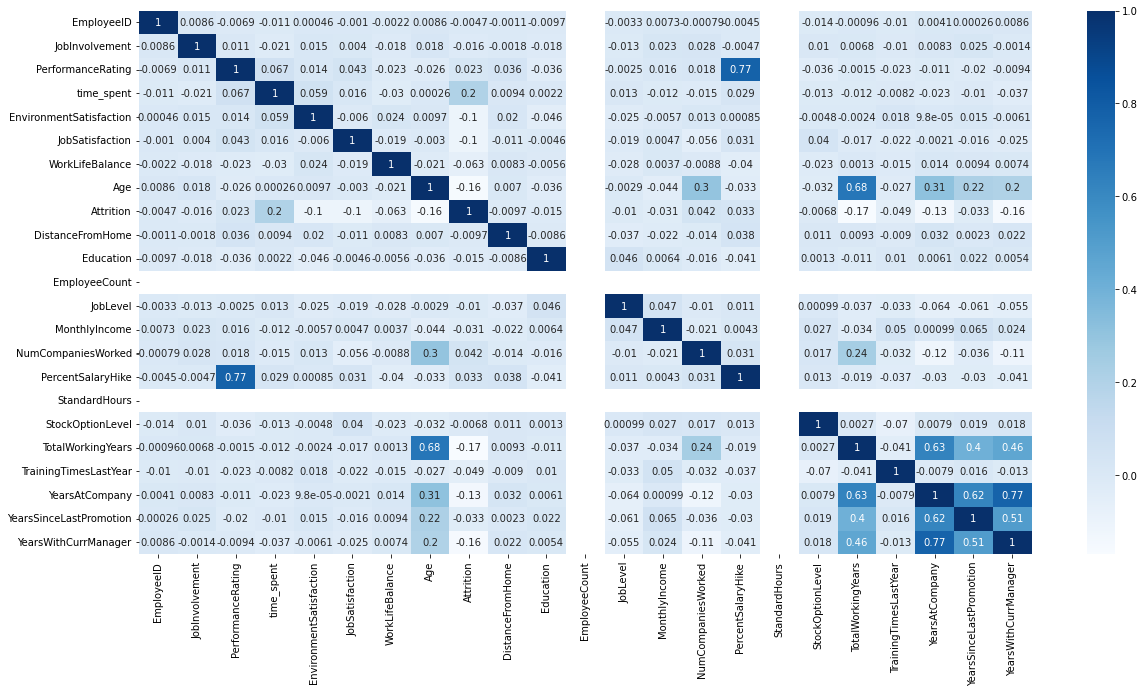

In [55]:
#correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(master_data.corr(),annot=True,cmap='Blues')


# Key observations from the above table and plots:

## Histograms
Majority of the variables are right skewed

## Boxplots
'MonthlyIncome' has very high number of outliers followed by 'TotalWorkingYears'

## Barplots

* Proportion of male employees is higher than female employees
* Majority of the employees are working in Research and Development department
* In terms of reviews from employees the company mostly gets a rating of 3 or more

# Correlation plot
* Below variable pairs are highly correlated
 * 'PercentSalaryHike' and 'PerformanceRating'
 * 'Age' and 'TotalWorkingYears'
 * 'YearsAtCompany' and 'YearsWithCurrManager'

# Z Score Method to remove the outlier Values
### Checking columns containing outliers in the above boxplots
### Considering Outlier values only if the Z-Score Values are greater than 3

In [56]:
z1 = np.abs(stats.zscore(master_data['MonthlyIncome']))
z2 = np.abs(stats.zscore(master_data['TotalWorkingYears']))
z3 = np.abs(stats.zscore(master_data['NumCompaniesWorked']))
z4 = np.abs(stats.zscore(master_data['YearsAtCompany']))

threshold = 3

In [57]:
print(np.where(z1 > threshold)) 
# Monthly Income has no outliers

(array([], dtype=int64),)


In [58]:
print(np.where(z2 > 3)) #Total working years

(array([  12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339], dtype=int64),)


In [59]:
# examining outlier values in total working years
master_data.YearsAtCompany.loc[[12,  143,  187,  337,  366,  636,  698,  785,  858,  926, 1043,
       1143, 1297, 1310, 1338, 1399, 1482, 1613, 1657, 1807, 1836, 2106,
       2168, 2255, 2328, 2396, 2513, 2613, 2767, 2780, 2808, 2869, 2952,
       3083, 3127, 3277, 3306, 3576, 3638, 3725, 3798, 3866, 3983, 4083,
       4237, 4250, 4278, 4339]].describe()

count    48.000000
mean     18.375000
std      12.861992
min       5.000000
25%       8.500000
50%      10.000000
75%      32.250000
max      40.000000
Name: YearsAtCompany, dtype: float64

<AxesSubplot:xlabel='YearsAtCompany'>

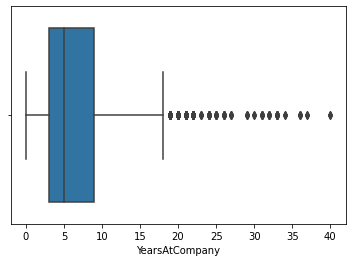

In [60]:
sns.boxplot(master_data['YearsAtCompany'])

Even though values of **TotalWorkingyears** are outliers as per Zscore, intuitively they seems alright.

In [61]:
print(np.where(z3 > 3)) #Number of companies worked #no outliers

(array([], dtype=int64),)


In [62]:
print(np.where(z4 > 3)) #years at company

(array([  12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389], dtype=int64),)


In [63]:
# examining outlier values in years at company
master_data.YearsAtCompany.loc[[12,  153,  167,  215,  219,  303,  334,  337,  395,  419,  491,
        603,  656,  660,  704,  828,  853,  858,  877,  880, 1274, 1310,
       1338, 1402, 1449, 1482, 1623, 1637, 1685, 1689, 1773, 1804, 1807,
       1865, 1889, 1961, 2073, 2126, 2130, 2174, 2298, 2323, 2328, 2347,
       2350, 2744, 2780, 2808, 2872, 2919, 2952, 3093, 3107, 3155, 3159,
       3243, 3274, 3277, 3335, 3359, 3431, 3543, 3596, 3600, 3644, 3768,
       3793, 3798, 3817, 3820, 4214, 4250, 4278, 4342, 4389]].describe()

count    75.000000
mean     31.320000
std       3.698648
min      26.000000
25%      29.000000
50%      32.000000
75%      33.000000
max      40.000000
Name: YearsAtCompany, dtype: float64

Even though values of **'YearsAtCompany'**are outliers as per Zscore, intuitively they seems alright

In [64]:
Unique_count=pd.DataFrame(master_data.nunique())

In [65]:
Unique_count

,0
EmployeeID,4410
JobInvolvement,4
PerformanceRating,2
time_spent,4410
EnvironmentSatisfaction,4
JobSatisfaction,4
WorkLifeBalance,4
Age,43
Attrition,2
BusinessTravel,3


From above table we observe that below fields have just one unique value and hence they won't provide any distinctive power to the classification

* Over18
* EmployeeCount
* StandardHours
* Also, EmployeeID is an ID field and hence will not be required for the classification

We will remove these columns before modeling



In [66]:
master_data.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeID'],axis=1,inplace=True)

In [67]:
master_data.columns

Index(['JobInvolvement', 'PerformanceRating', 'time_spent',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Model Building

In [68]:
master_data['Attrition'].value_counts(normalize=True)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

16% of the observations are our target for the model

For Modeling we need to convert Categorical variables into dummy variables



In [69]:
def dummy_func(col_name):
    x = pd.get_dummies(master_data[col_name],drop_first=True, prefix = col_name, prefix_sep="_")
    return x
# The dummy function is creating a dataframe for each of categorical variable 
# with its dummy values in it with name of columns prefixed by the variable name

CBusinessTravel = dummy_func('BusinessTravel')
CDepartment = dummy_func('Department')
CEducationField = dummy_func('EducationField')
CGender = dummy_func('Gender')
CJobRole = dummy_func('JobRole')
CMaritalStatus = dummy_func('MaritalStatus')
CEducation = dummy_func('Education')
CJobLevel = dummy_func('JobLevel')

In [70]:
# We will remove categorical fields from master data and will append dummy variables 
master_data.drop(['BusinessTravel',"Department","EducationField",'Gender','JobRole','MaritalStatus','Education','JobLevel'],axis=1,inplace=True)

master_data = pd.concat([master_data,CBusinessTravel,CDepartment,CEducationField,CGender,CJobRole,CMaritalStatus,CEducation,CJobLevel],axis=1)

master_data.head(3)


,JobInvolvement,PerformanceRating,time_spent,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,MonthlyIncome,...,MaritalStatus_Married,MaritalStatus_Single,Education_2,Education_3,Education_4,Education_5,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
0,3,3,7.373651,3.0,4.0,2.0,51,0,6,131160,...,1,0,1,0,0,0,0,0,0,0
1,2,4,7.718969,3.0,2.0,4.0,31,1,10,41890,...,0,1,0,0,0,0,0,0,0,0
2,3,3,7.013240,2.0,2.0,1.0,32,0,17,193280,...,1,0,0,0,1,0,0,0,1,0


In [71]:
master_data.rename(columns = {"Department_Research & Development":"Department_RnD"}, 
                   inplace = True)

For modeling we will split our data into training and test set taking 80-20 split respectively

In [72]:
from sklearn.model_selection import train_test_split
x=master_data.drop(['Attrition'],axis=1)
y=master_data[['Attrition']]
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=221)

In [73]:
y_train['Attrition'].value_counts(), y_test['Attrition'].value_counts() #counts check

(0    2957
 1     571
 Name: Attrition, dtype: int64,
 0    742
 1    140
 Name: Attrition, dtype: int64)

# Model 1 
# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(fit_intercept=True, multi_class='auto', solver='lbfgs')
lgr.fit(x_train,y_train)

LogisticRegression()

In [75]:
#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# in-sample prediction
y_pred = lgr.predict(x_train)
print(confusion_matrix(y_train, y_pred)) #train data

#out of sample prediction
y_pred_test = lgr.predict(x_test)
print(confusion_matrix(y_test, y_pred_test)) #test data

[[2914   43]
 [ 500   71]]
[[730  12]
 [119  21]]


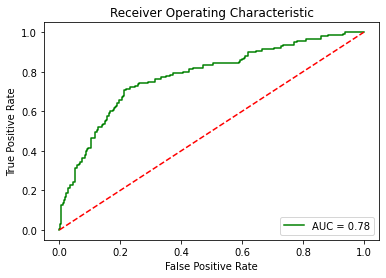

In [76]:
#ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import matplotlib.pyplot as plt


probs0 = lgr.predict_proba(x_test)
pred0 = probs0[:,1]
fpr0, tpr0, threshold0 = metrics.roc_curve(y_test, pred0)
roc_auc0 = metrics.auc(fpr0, tpr0)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr0, tpr0, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc0);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
# Model preformance : Logistic Regression
from sklearn.metrics import accuracy_score
print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_test),3)))

In-sample Accuracy: 0.846
Out of sample Accuracy: 0.851


# Classification Tree

A Classifcation Tree was fitted on the training data with Gini Index as node splitting criteria.

In [78]:
# classification tree
from sklearn import tree as treee

clf = treee.DecisionTreeClassifier(random_state=21)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=21)

In [79]:
y_pred_clf = clf.predict(x_train) #in-sample prediction
print(confusion_matrix(y_train, y_pred_clf))

y_pred_clf_test = clf.predict(x_test) # out-of sample prediction
print(confusion_matrix(y_test, y_pred_clf_test))

[[2957    0]
 [   0  571]]
[[741   1]
 [  6 134]]


In [80]:
# Model preformance : Classification Tree

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_clf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_clf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.992


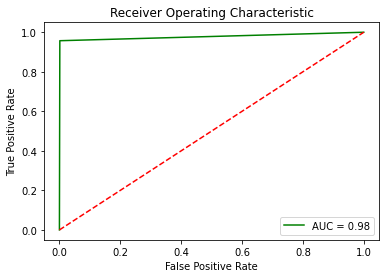

In [81]:
# ROC Curve and AUC
probs1 = clf.predict_proba(x_test)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

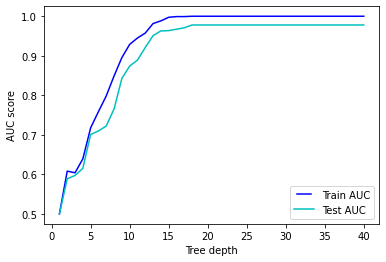

In [82]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix,recall_score

depths = np.linspace(1, 40, 40)
train_results = []
test_results = []

for i in depths:
    tree=treee.DecisionTreeClassifier(max_depth=i,random_state=10)
    tree.fit(x_train, y_train)
    train_pred = tree.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = tree.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(depths, train_results,color='b', label='Train AUC')
line2, = plt.plot(depths, test_results,color='c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [83]:
int(depths[test_results.index(max(test_results))])

18

Max depth of the tree will be set to 19 as it gives best test AUC of ROC curve.

Now, we will prune the tree setting max_dept to 19.

In [84]:
#pruning the classification tree based on the the above analysis
pruned_clf = treee.DecisionTreeClassifier(max_depth = 18, random_state= 21)
pruned_clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=18, random_state=21)

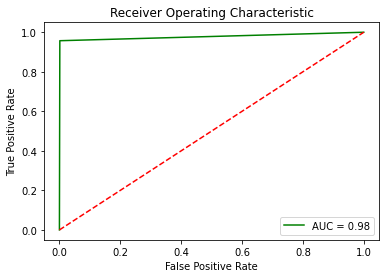

In [85]:
#ROC curve and AUC
probs2 = pruned_clf.predict_proba(x_test)
pred2 = probs1[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr2, tpr2, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc2);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [86]:
y_pred_pruned_clf = pruned_clf.predict(x_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_pruned_clf))

y_pred_pruned_clf_test = pruned_clf.predict(x_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_pruned_clf_test))

[[2957    0]
 [   0  571]]
[[741   1]
 [  6 134]]


In [87]:
# Model preformance : Classification Tree after pruning

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_pruned_clf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_pruned_clf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.992


# Random Forests

In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=46, bootstrap = True, max_depth = 18, random_state=21)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=18, n_estimators=46, random_state=21)

In [89]:
y_pred_rf = rf.predict(x_train) # in sample prediction
print(confusion_matrix(y_train, y_pred_rf))

y_pred_rf_test = rf.predict(x_test) # out of sample prediction
print(confusion_matrix(y_test, y_pred_rf_test))

[[2957    0]
 [   0  571]]
[[742   0]
 [  6 134]]


In [90]:
# Model preformance : Classification Tree after pruning

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_rf),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_rf_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.993


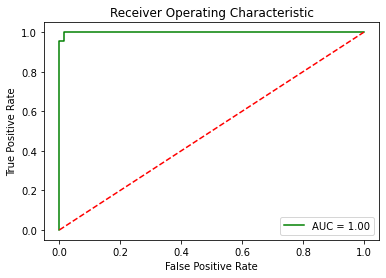

In [91]:
#ROC curve and AUC
probs3 = rf.predict_proba(x_test)
pred3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr3, tpr3, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc3);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Importance Plot

<AxesSubplot:>

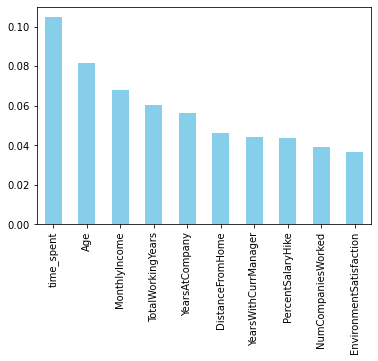

In [92]:
#Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar', color = "skyblue")

The above feature importance plot gives us the top 10 most significant variables for prediction of employee attrition.


# Support Vector Machine

In [93]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', probability = True, random_state=21)
svm.fit(x_train, y_train.values.ravel())

SVC(gamma='auto', probability=True, random_state=21)

In [94]:
y_pred_svm = svm.predict(x_train) #in sample prediction
print(confusion_matrix(y_train, y_pred_svm))

y_pred_svm_test = svm.predict(x_test) #out of sample prediction
print(confusion_matrix(y_test, y_pred_svm_test))


[[2957    0]
 [   0  571]]
[[742   0]
 [  9 131]]


In [95]:
# Model preformance : SVM

print("In-sample Accuracy: " + str(round(accuracy_score(y_train,y_pred_svm),3)))
print("Out of sample Accuracy: " + str(round(accuracy_score(y_test,y_pred_svm_test),3)))

In-sample Accuracy: 1.0
Out of sample Accuracy: 0.99


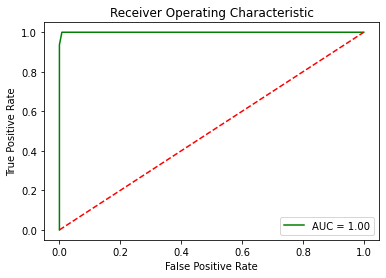

In [96]:
#ROC
#ROC curve and AUC
probs4 = svm.predict_proba(x_test)
pred4 = probs4[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, pred4)
roc_auc4 = metrics.auc(fpr4, tpr4)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr4, tpr4, 'b', color = 'green', label = 'AUC = %0.2f' % roc_auc4);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Summary Table

In [97]:
df=pd.DataFrame({'Model':['Logistic Regression','Classification Tree','Random Forest','Support Vector Machines'],
                'In-Sample-Accuracy':[0.846,1,1,1],'Out-Sample-Accuracy':[0.851,0.992,0.993,0.990],
                 'AUC of ROC Curve':[0.78,0.98,1,1]})

In [98]:
df

,Model,In-Sample-Accuracy,Out-Sample-Accuracy,AUC of ROC Curve
0,Logistic Regression,0.846,0.851,0.78
1,Classification Tree,1.000,0.992,0.98
2,Random Forest,1.000,0.993,1.00
3,Support Vector Machines,1.000,0.990,1.00


It is evident from the summary table that Random Forest is the best performing model. 

## We recommend Random Forests for Employee Atrrition predictions.

# Conclusion

After data analysis of the Employee Attrition datasets, it was observed that 'Total time spent in the office', 'age', 'total working years', 'years at company', 'monthly salary', 'distance from home', 'percent salary hike', 'number of companies worked at' and 'environment satisfaction' are the key parameters that decide whether an employee will leave the company.